In [86]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

# 1. Reproduce the SST curve from the figure below

In [87]:
# Load the data and drop the time_bnds variable
ds = xr.open_dataset('/data9/GR6901/data/sst.mnmean.nc', drop_variables=['time_bnds'])

# Trim the data to 1950 onward
ds = ds.sel(time=slice('1950', '2024'))
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 890)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-03-03

In [88]:
# Calculate the climatology
gb = ds.sst.groupby('time.month')
sst_mm = gb.mean(dim='time')
sst_mm

<xarray.DataArray 'sst' (month: 12, lat: 89, lon: 180)>
array([[[-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
        [-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
        [-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
        [-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
        [-1.8000013, -1.8000013, -1.8000013, ..., -1.8000013,
         -1.8000013, -1.8000013],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.799636 , -1.7997097, -1.7998886, ..., -1.7998346,
         -1.7997364, -1.7996325],
        [-1.7996812, -1.7998247, -1.8000011, ..., -1.8000011,
         -1.7998598, -1.799701 ],
        [-1.8000011, -1.8000011, -1.8000011, ..., -1.8000011,
         -1.8000011, -1.8000011],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [89]:
# Calculate the the SST anomaly
sst_anom = gb - sst_mm
sst_anom

<xarray.DataArray 'sst' (time: 890, lat: 89, lon: 180)>
array([[[ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        [ 1.3113022e-06,  1.3113022e-06,  1.3113022e-06, ...,
          1.3113022e-06,  1.3113022e-06,  1.3113022e-06],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 4 5 6 7 8 9 10 11 12 1 2

In [90]:
# Select the Niño 3.4 region
nino34_sst_anom = sst_anom.sel(lat=slice(5, -5), lon=slice(360-170, 360-120))
nino34_sst_anom_mean = nino34_sst_anom.mean(dim=['lat','lon'])
nino34_sst_anom_mean

<xarray.DataArray 'sst' (time: 890)>
array([-1.87242520e+00, -1.57435298e+00, -1.24870038e+00, -1.29027069e+00,
       -1.49967742e+00, -1.04449093e+00, -8.03509653e-01, -7.95043111e-01,
       -8.31367433e-01, -8.50483954e-01, -1.06053209e+00, -1.17540157e+00,
       -1.17720389e+00, -9.18045998e-01, -2.16112956e-01,  1.39046889e-02,
        2.33704358e-01,  2.15122744e-01,  5.07497728e-01,  3.40099633e-01,
        6.56647086e-01,  6.62145317e-01,  7.27772474e-01,  4.47784543e-01,
        2.42554903e-01,  1.09408833e-01,  5.86052388e-02,  2.30211869e-01,
        9.87022221e-02, -3.32349271e-01, -5.59330285e-01, -3.78154099e-01,
       -2.10636407e-01, -2.80377775e-01, -6.07840359e-01, -2.62032092e-01,
        3.06055099e-01,  3.58210891e-01,  4.43078607e-01,  4.53345776e-01,
        5.82426548e-01,  6.02976441e-01,  3.39947104e-01,  2.56819308e-01,
        4.34343576e-01,  3.33985806e-01,  3.52389812e-01,  5.37249029e-01,
        5.44569254e-01,  3.87029141e-01, -2.17120841e-01, -9.29142773e-01,
       -5.78993440e-01, -7.23862827e-01, -9.80721235e-01, -1.25540054e+00,
       -1.45184553e+00, -1.30920625e+00, -9.59900081e-01, -1.20698285e+00,
       -8.12150478e-01, -8.25054526e-01, -8.97335589e-01, -9.68969047e-01,
       -1.03820896e+00, -9.70701814e-01, -9.45582032e-01, -1.17103004e+00,
       -1.28658473e+00, -2.12573481e+00, -2.27212119e+00, -1.89895177e+00,
       -1.08829951e+00, -8.67820978e-01, -6.60292864e-01, -7.21511960e-01,
       -5.62493563e-01, -7.04360485e-01, -8.61197591e-01, -1.00253439e+00,
...
       -2.75346726e-01, -3.81991893e-01, -7.80860841e-01, -8.62129927e-01,
       -8.54443014e-01, -6.58029199e-01, -6.28613651e-01, -2.55991668e-01,
        4.88330387e-02,  2.74893343e-01,  3.50399405e-01,  2.93604106e-01,
        6.41367078e-01,  1.09918797e+00,  1.10066855e+00,  1.02848828e+00,
        7.79194951e-01,  8.45136106e-01,  9.83227313e-01,  8.78118873e-01,
        8.06823254e-01,  6.75786972e-01,  5.69248140e-01,  2.35831708e-01,
        2.00908989e-01,  6.80519104e-01,  7.16083527e-01,  6.61692560e-01,
        7.28651166e-01,  4.93656099e-01,  6.50524318e-01,  6.14501297e-01,
       -2.54434440e-02, -1.16435595e-01, -8.51307660e-02, -4.00091320e-01,
       -6.68957770e-01, -1.05830491e+00, -1.22813261e+00, -1.00948060e+00,
       -8.77350092e-01, -8.81704390e-01, -6.31949365e-01, -4.71465588e-01,
       -2.17377663e-01, -6.63234144e-02, -1.83913633e-01, -3.52366567e-01,
       -4.00790036e-01, -7.59988070e-01, -7.66690373e-01, -9.32017386e-01,
       -8.30287695e-01, -7.72649825e-01, -8.09478164e-01, -8.70378911e-01,
       -8.73910904e-01, -5.43477237e-01, -4.95664269e-01, -7.97802269e-01,
       -9.22379315e-01, -8.14696074e-01, -7.29381263e-01, -7.24276841e-01,
       -5.98060250e-01, -3.40260595e-01,  5.61668091e-02,  3.81727189e-01,
        7.02579975e-01,  1.05021858e+00,  1.22804451e+00,  1.52966797e+00,
        1.75334752e+00,  1.90285802e+00,  2.20032573e+00,  2.15740252e+00,
        1.93879044e+00,  1.68270910e+00], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 4 5 6 7 8 9 10 11 12 1 2

In [91]:
# Calculate the rolling 3-month average of the SST anomaly
sst_anom_rolling = nino34_sst_anom_mean.rolling(time=3, center=True).mean()
sst_anom_rolling

<xarray.DataArray 'sst' (time: 890)>
array([            nan, -1.56515944e+00, -1.37110806e+00, -1.34621620e+00,
       -1.27814651e+00, -1.11589277e+00, -8.81014705e-01, -8.09973478e-01,
       -8.25631618e-01, -9.14128006e-01, -1.02880609e+00, -1.13771272e+00,
       -1.09021735e+00, -7.70454526e-01, -3.73418301e-01,  1.04984846e-02,
        1.54243723e-01,  3.18774760e-01,  3.54239821e-01,  5.01414657e-01,
        5.52963853e-01,  6.82188153e-01,  6.12567306e-01,  4.72703785e-01,
        2.66582578e-01,  1.36856139e-01,  1.32741794e-01,  1.29172921e-01,
       -1.14524364e-03, -2.64325976e-01, -4.23278064e-01, -3.82707119e-01,
       -2.89722979e-01, -3.66285056e-01, -3.83416951e-01, -1.87939316e-01,
        1.34077772e-01,  3.69114637e-01,  4.18211550e-01,  4.92950082e-01,
        5.46249390e-01,  5.08449793e-01,  3.99914026e-01,  3.43703091e-01,
        3.41715991e-01,  3.73572826e-01,  4.07874674e-01,  4.78069156e-01,
        4.89615619e-01,  2.38158986e-01, -2.53078341e-01, -5.75085878e-01,
       -7.43999898e-01, -7.61192739e-01, -9.86661792e-01, -1.22932267e+00,
       -1.33881760e+00, -1.24031746e+00, -1.15869653e+00, -9.93011236e-01,
       -9.48062778e-01, -8.44846964e-01, -8.97119880e-01, -9.68171299e-01,
       -9.92626667e-01, -9.84831035e-01, -1.02910471e+00, -1.13439906e+00,
       -1.52778327e+00, -1.89481354e+00, -2.09893608e+00, -1.75312424e+00,
       -1.28502417e+00, -8.72137904e-01, -7.49875426e-01, -6.48099601e-01,
       -6.62788808e-01, -7.09350705e-01, -8.56030941e-01, -9.01279688e-01,
...
       -2.09454820e-01, -4.79399770e-01, -6.74994171e-01, -8.32477927e-01,
       -7.91534066e-01, -7.13695288e-01, -5.14211535e-01, -2.78590769e-01,
        2.25782394e-02,  2.24708602e-01,  3.06298971e-01,  4.28456873e-01,
        6.78053081e-01,  9.47074592e-01,  1.07611501e+00,  9.69450653e-01,
        8.84273171e-01,  8.69186163e-01,  9.02160823e-01,  8.89389873e-01,
        7.86909759e-01,  6.83952808e-01,  4.93622303e-01,  3.35329652e-01,
        3.72420013e-01,  5.32503963e-01,  6.86098456e-01,  7.02142417e-01,
        6.27999961e-01,  6.24277234e-01,  5.86227298e-01,  4.13194120e-01,
        1.57540798e-01, -7.56698847e-02, -2.00552508e-01, -3.84726584e-01,
       -7.09118009e-01, -9.85131741e-01, -1.09863937e+00, -1.03832102e+00,
       -9.22845006e-01, -7.97001243e-01, -6.61706388e-01, -4.40264165e-01,
       -2.51722157e-01, -1.55871511e-01, -2.00867817e-01, -3.12356710e-01,
       -5.04381537e-01, -6.42489433e-01, -8.19565237e-01, -8.42998445e-01,
       -8.44984949e-01, -8.04138541e-01, -8.17502260e-01, -8.51256013e-01,
       -7.62588978e-01, -6.37684107e-01, -6.12314582e-01, -7.38615215e-01,
       -8.44959140e-01, -8.22152138e-01, -7.56118000e-01, -6.83906078e-01,
       -5.54199219e-01, -2.94051290e-01,  3.25445347e-02,  3.80158067e-01,
        7.11508691e-01,  9.93614435e-01,  1.26931047e+00,  1.50368679e+00,
        1.72862470e+00,  1.95217729e+00,  2.08686233e+00,  2.09883976e+00,
        1.92630088e+00,             nan], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2024-02-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 4 5 6 7 8 9 10 11 12 1 2

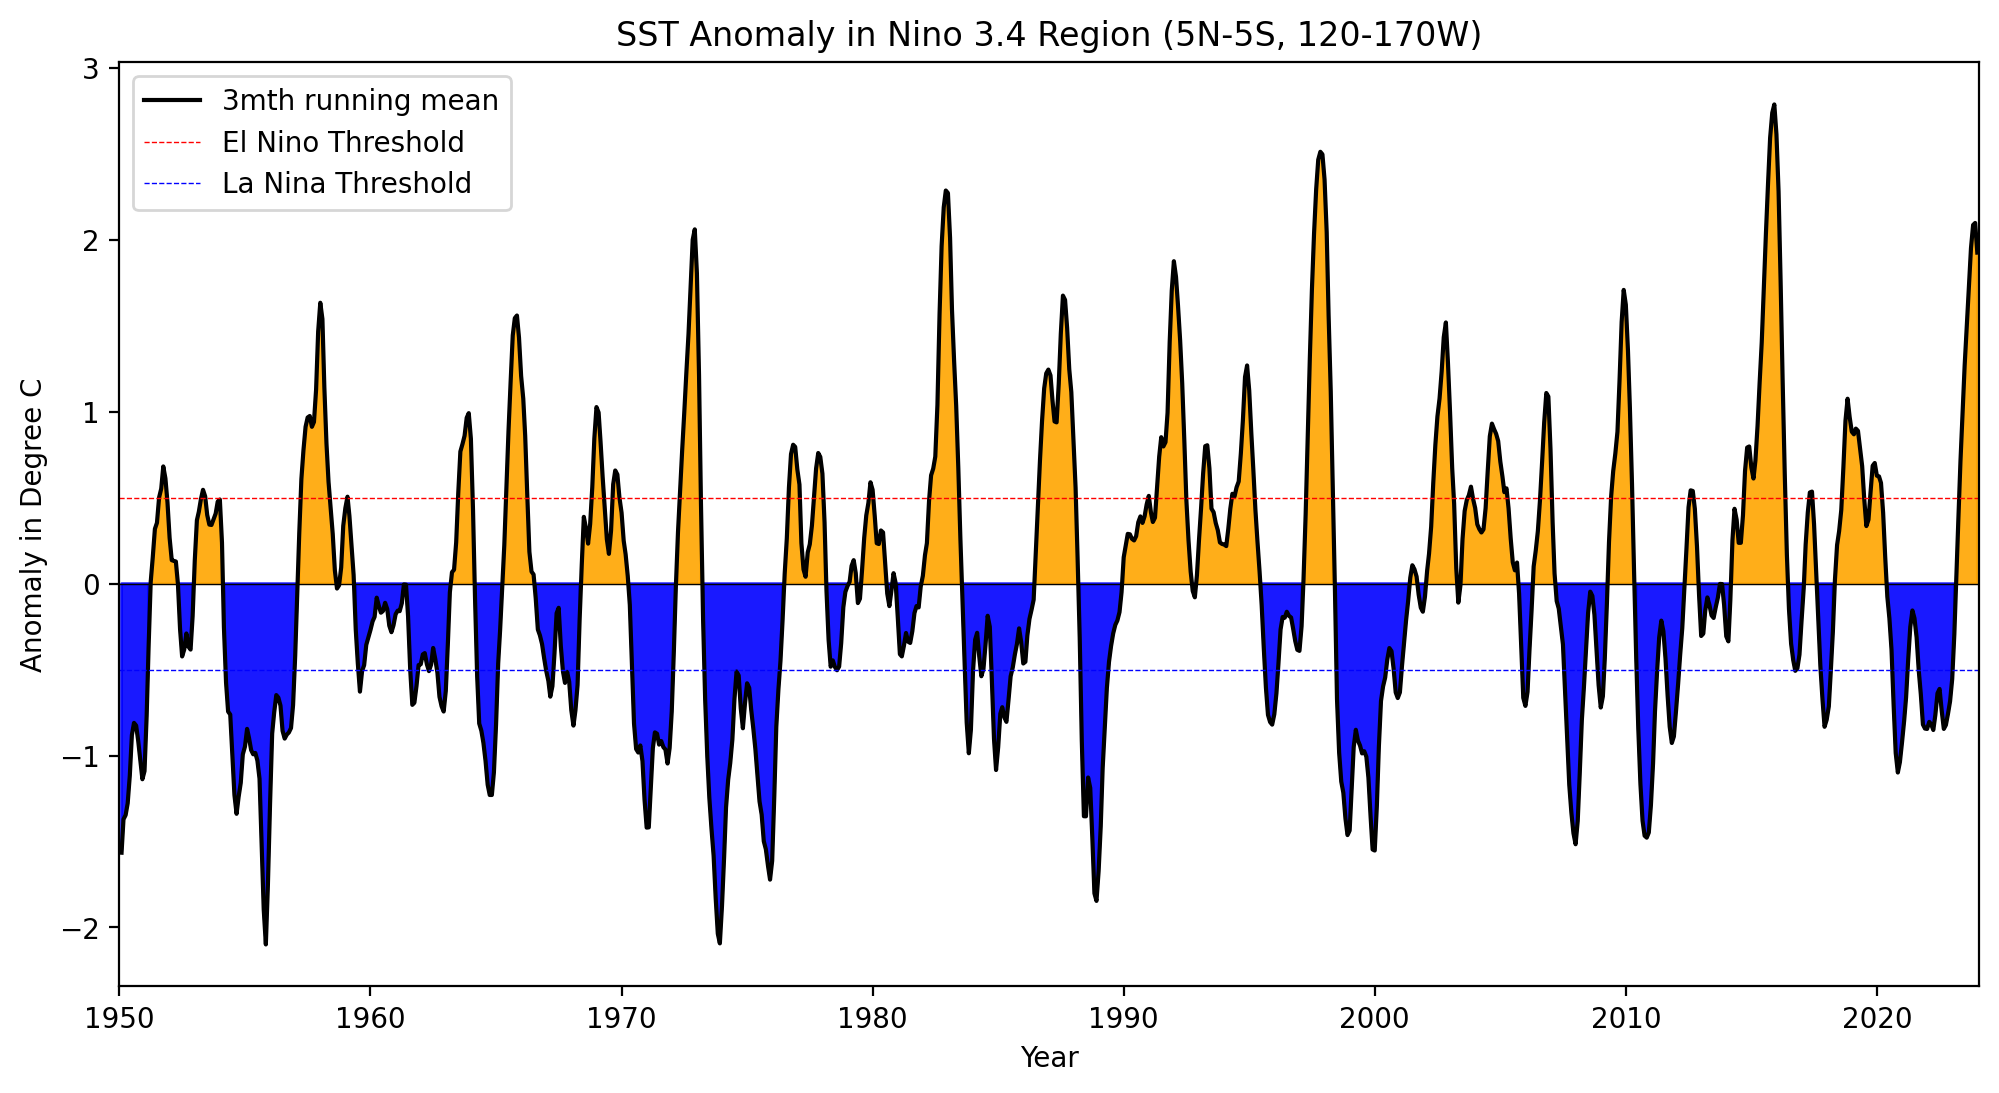

In [92]:
# Plot the 3-month running mean
sst_anom_rolling.plot(color='black', label='3mth running mean')

# Fill above 0 anomaly with orange
plt.fill_between(
    sst_anom_rolling.time.data,
    sst_anom_rolling.where(sst_anom_rolling > 0).data,
    0,
    color='orange',
    alpha=0.9
)

# Fill below 0 anomaly with blue
plt.fill_between(
    sst_anom_rolling.time.data,
    sst_anom_rolling.where(sst_anom_rolling < 0).data,
    0,
    color='blue',  
    alpha=0.9
)

# Add horizontal lines for thresholds
plt.axhline(0, color='black', lw=0.5)
plt.axhline(0.5, color='red', linewidth=0.5, linestyle='dashed', label='El Nino Threshold')
plt.axhline(-0.5, color='blue', linewidth=0.5, linestyle='dashed', label='La Nina Threshold')


plt.xlim(left=sst_anom_rolling.time.data.min(), right=sst_anom_rolling.time.data.max())
plt.title('SST Anomaly in Nino 3.4 Region (5N-5S, 120-170W)')
plt.xlabel('Year')
plt.ylabel('Anomaly in Degree C')
plt.legend()

plt.show()

# 2. Calculate boolean timeseries representing the positive / negative ENSO phases

In [93]:
# Calculate the boolean time series for positive ENSO phases
positive_oni = ((sst_anom_rolling > 0.5).rolling(time=5, center=True).sum()==5).rolling(time=5, center=True).max()
negative_oni = ((sst_anom_rolling < -0.5).rolling(time=5, center=True).sum()==5).rolling(time=5, center=True).max()
oni_binary = positive_oni - negative_oni

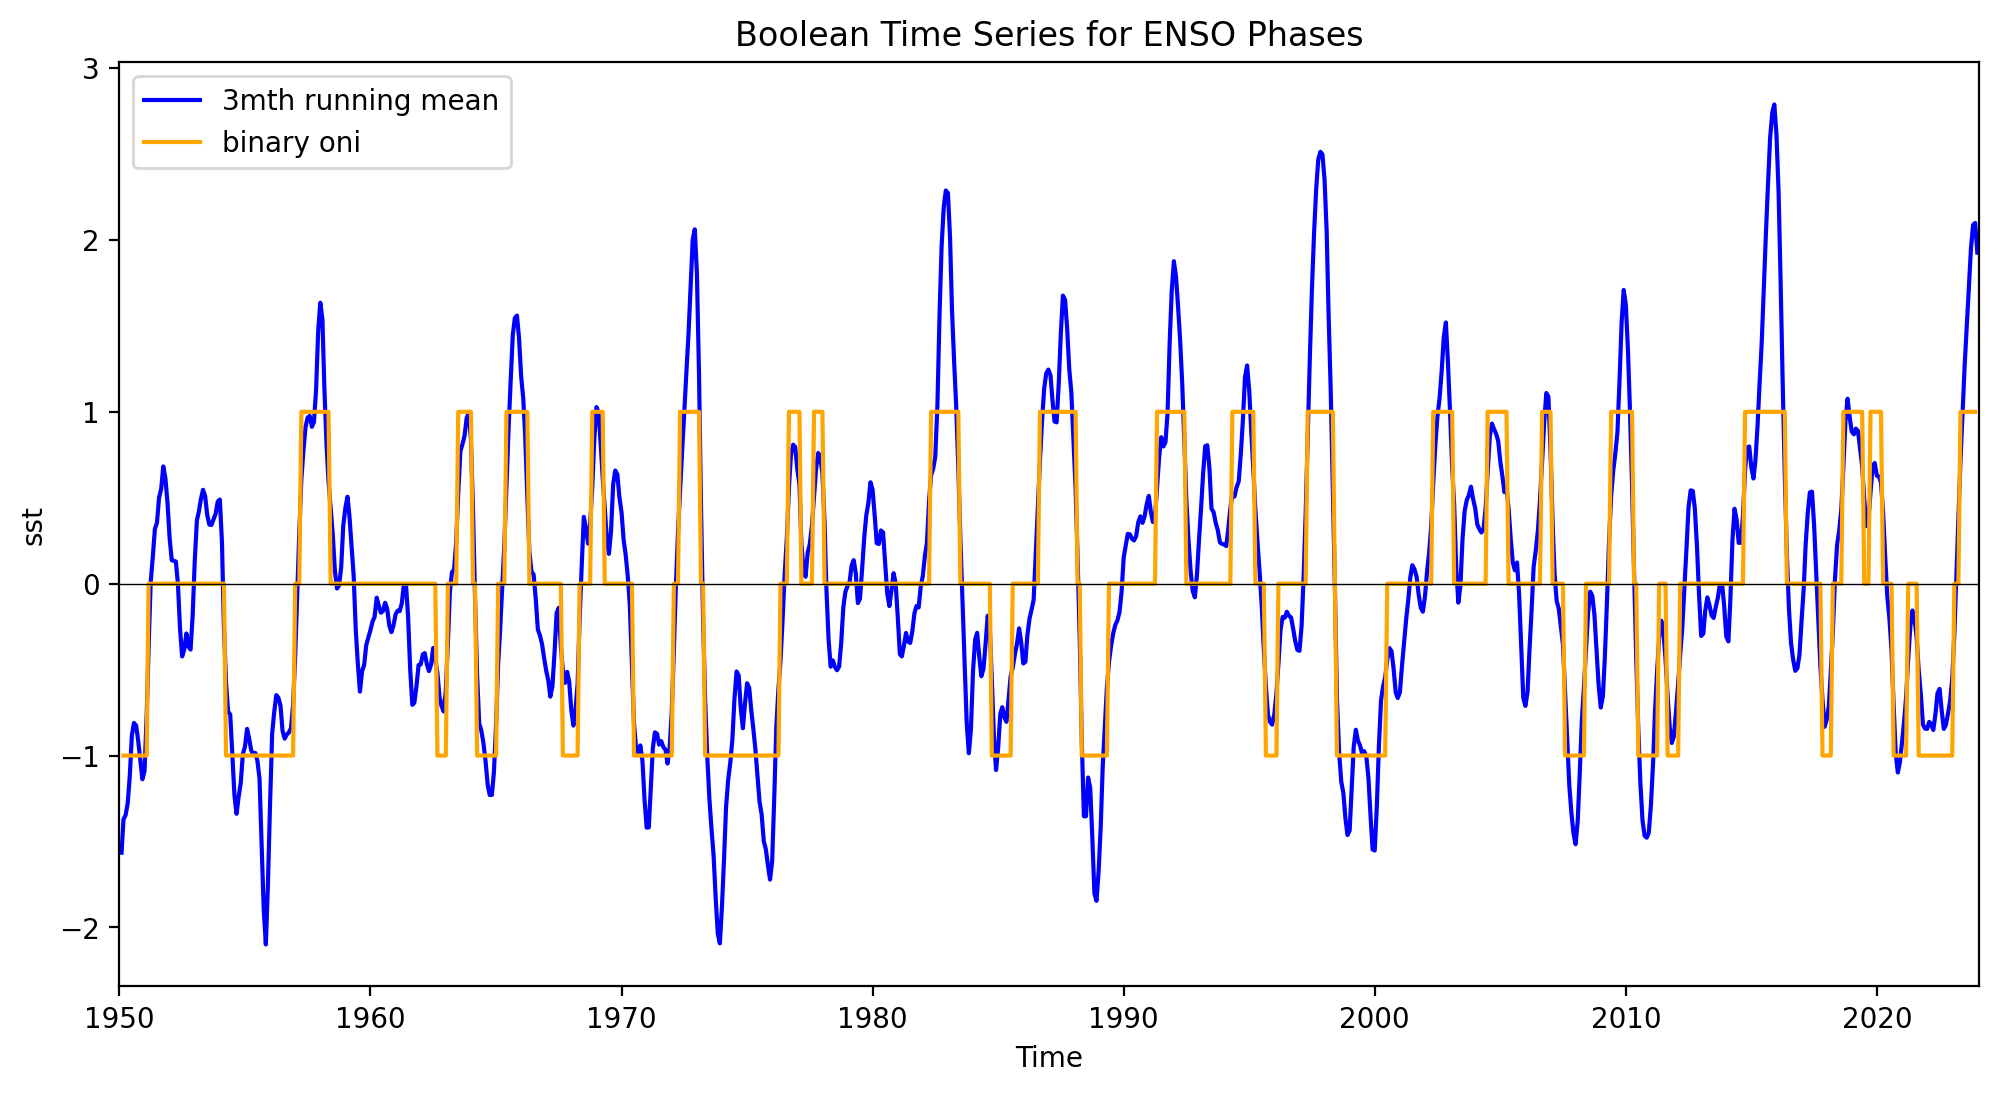

In [94]:
# Plot
sst_anom_rolling.plot(color='blue', label='3mth running mean')
oni_binary.plot(color='orange', label='binary oni')
plt.title('Boolean Time Series for ENSO Phases')
plt.axhline(0, color='black', lw=0.5)
plt.xlabel('Time')
plt.xlim(left=sst_anom_rolling.time.data.min(), right=sst_anom_rolling.time.data.max())
plt.legend()
plt.show()

# 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

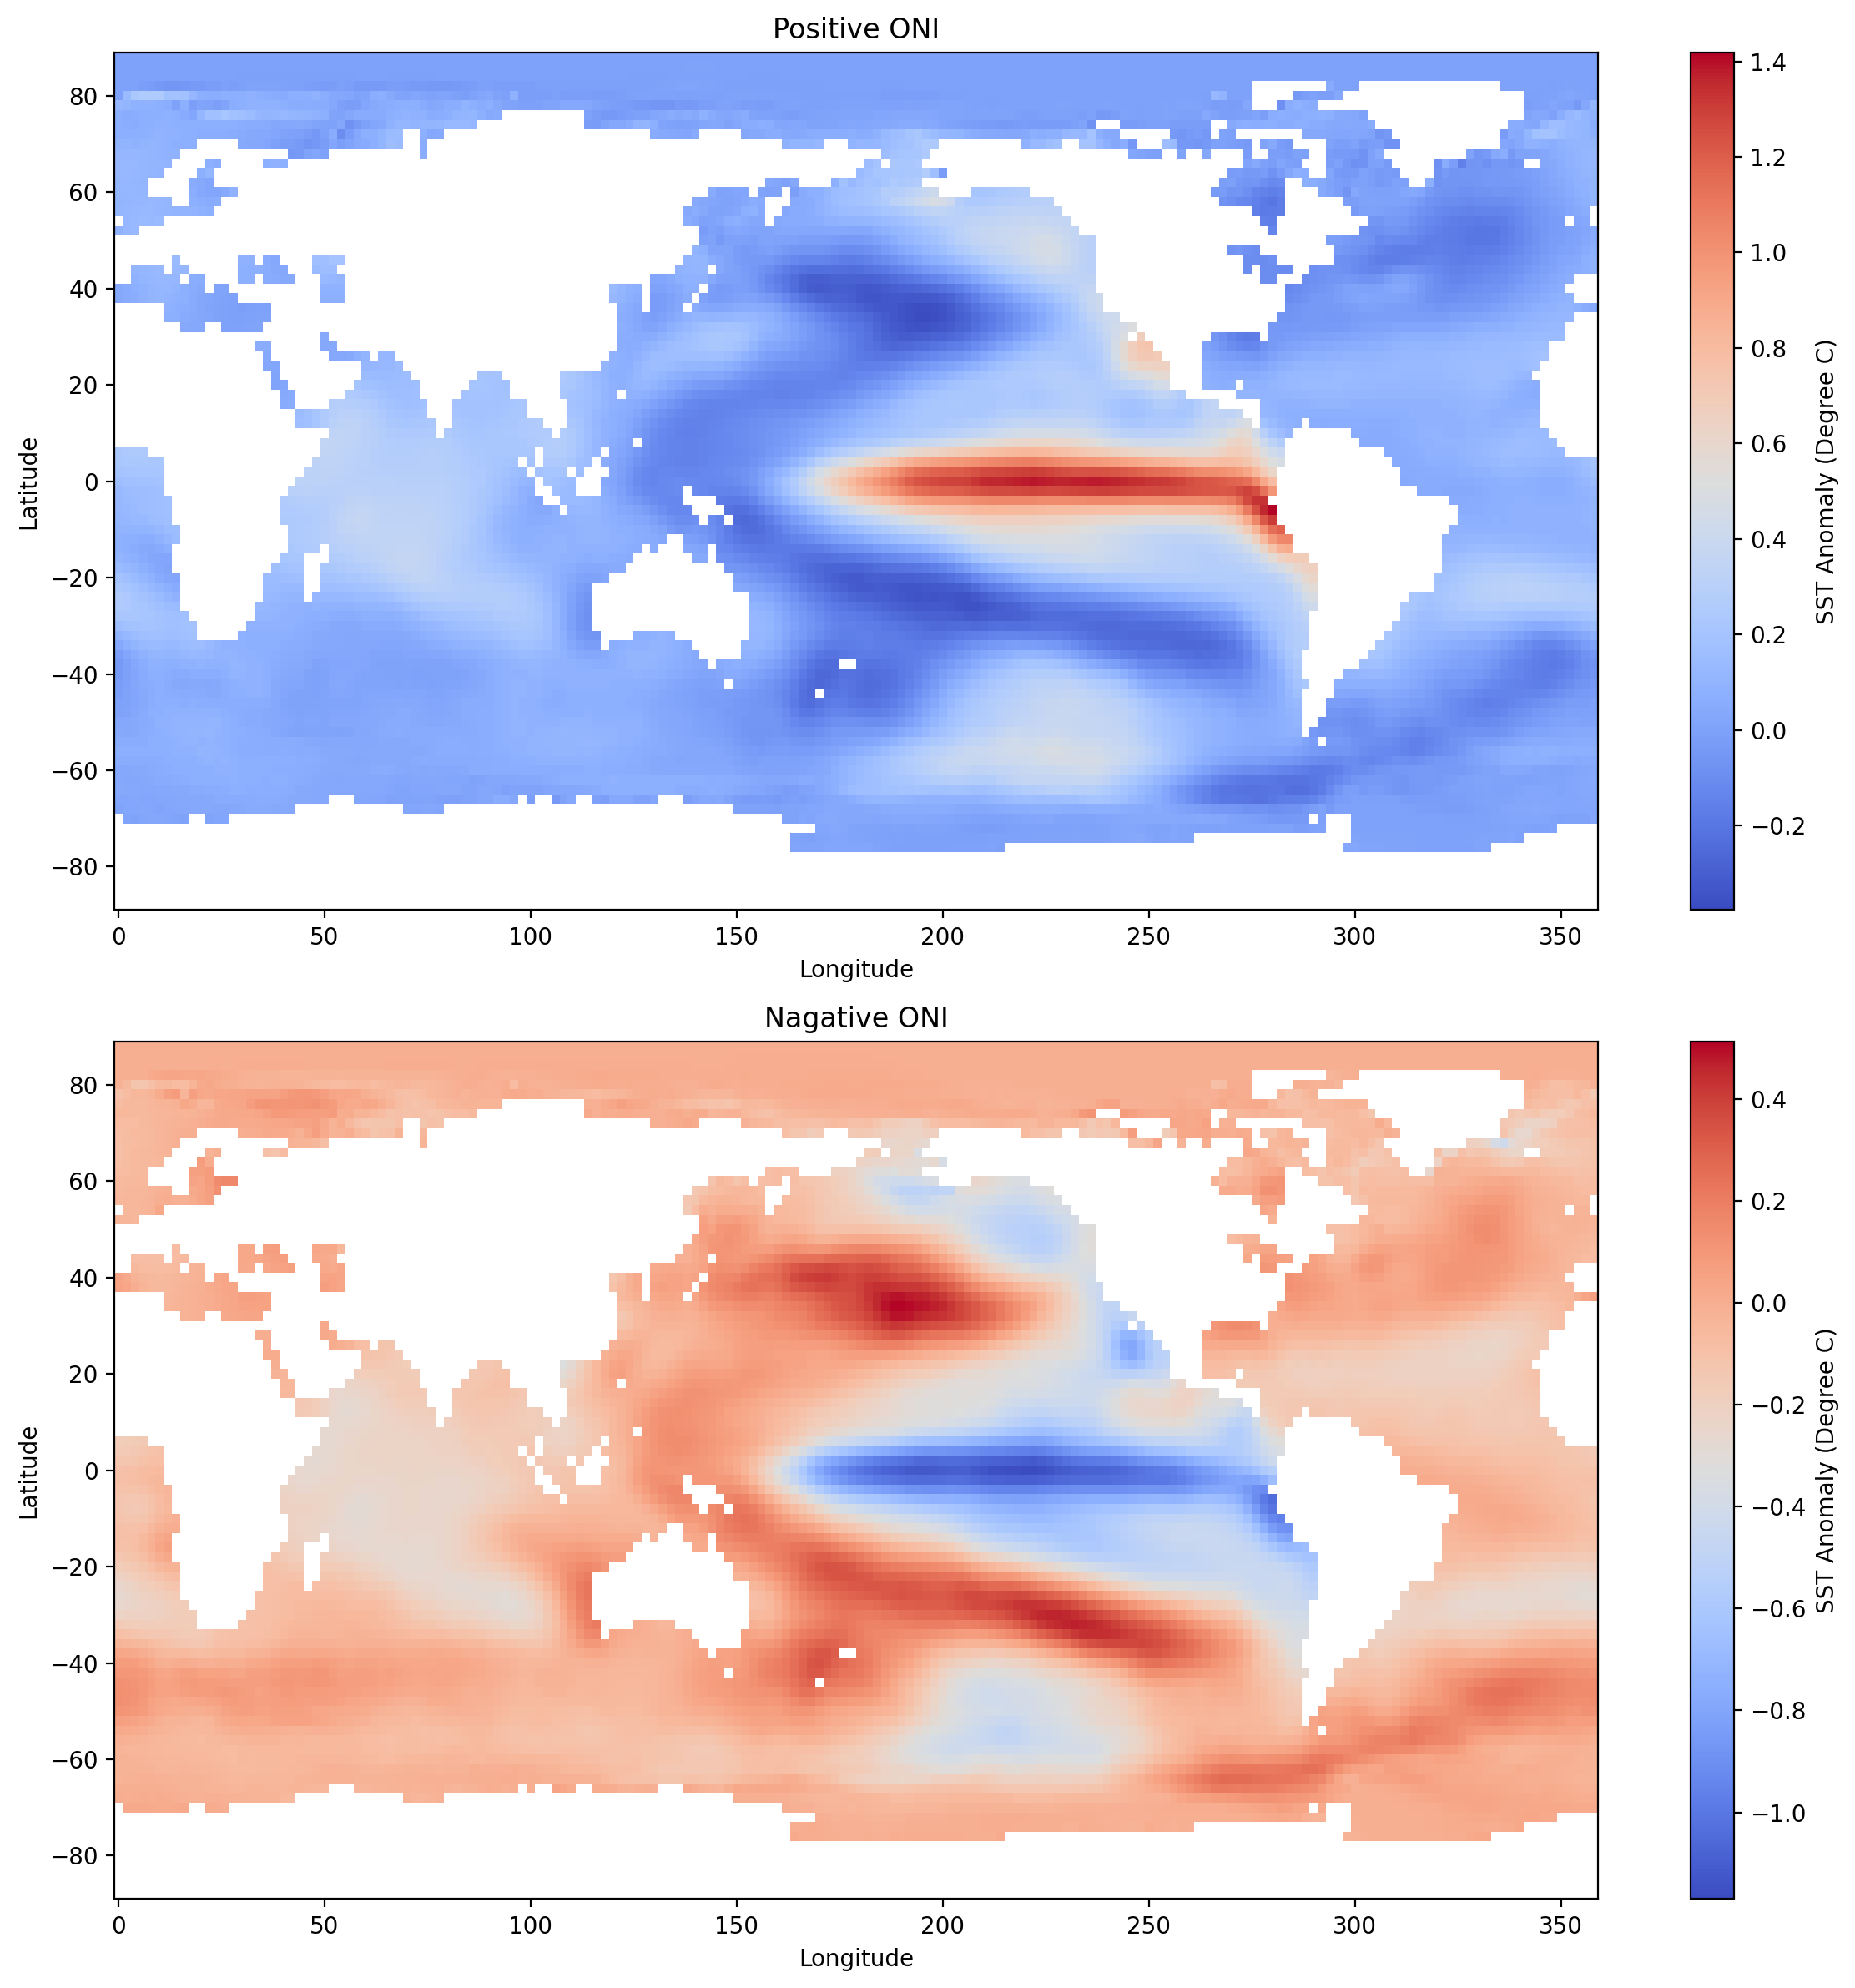

In [95]:
# Calculate positive and negative ONI
positive_oni_sst = sst_anom[oni_binary==1].mean(dim='time')
negative_oni_sst = sst_anom[oni_binary==-1].mean(dim='time')

# Plot
fig, ax = plt.subplots(nrows=2, figsize=(12, 12))
p = ax[0].pcolormesh(positive_oni_sst.lon, positive_oni_sst.lat, positive_oni_sst, cmap = 'coolwarm')
plt.colorbar(p, ax=ax[0], label='SST Anomaly (Degree C)')
ax[0].set_title('Positive ONI')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

n = ax[1].pcolormesh(negative_oni_sst.lon, negative_oni_sst.lat, negative_oni_sst, cmap = 'coolwarm')
plt.colorbar(n, ax=ax[1], label='SST Anomaly (Degree C)')
ax[1].set_title('Nagative ONI')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
plt.tight_layout()
plt.show()

# 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

In [96]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS'))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset>
Dimensions:  (Y: 72, X: 144, time: 356)
Coordinates:
  * Y        (Y) float32 88.75 86.25 83.75 81.25 ... -81.25 -83.75 -86.25 -88.75
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1960-01-01 1960-02-01 ... 1989-08-01
Data variables:
    prcp     (time, Y, X) float32 nan nan nan nan ... 0.6489 0.6437 0.636 0.6303
Attributes:
    Conventions:  IRIDL

In [97]:
dsp_start = dsp.time.isel(time=0).values
dsp_end = dsp.time.isel(time=-1).values

oni_pos = oni_binary.sel(time=slice(dsp_start,dsp_end))

positive_oni_precip = dsp.prcp[oni_pos==1].mean(dim='time')
negative_oni_precip = dsp.prcp[oni_pos==-1].mean(dim='time')

# Calculate difference
difference = positive_oni_precip - negative_oni_precip

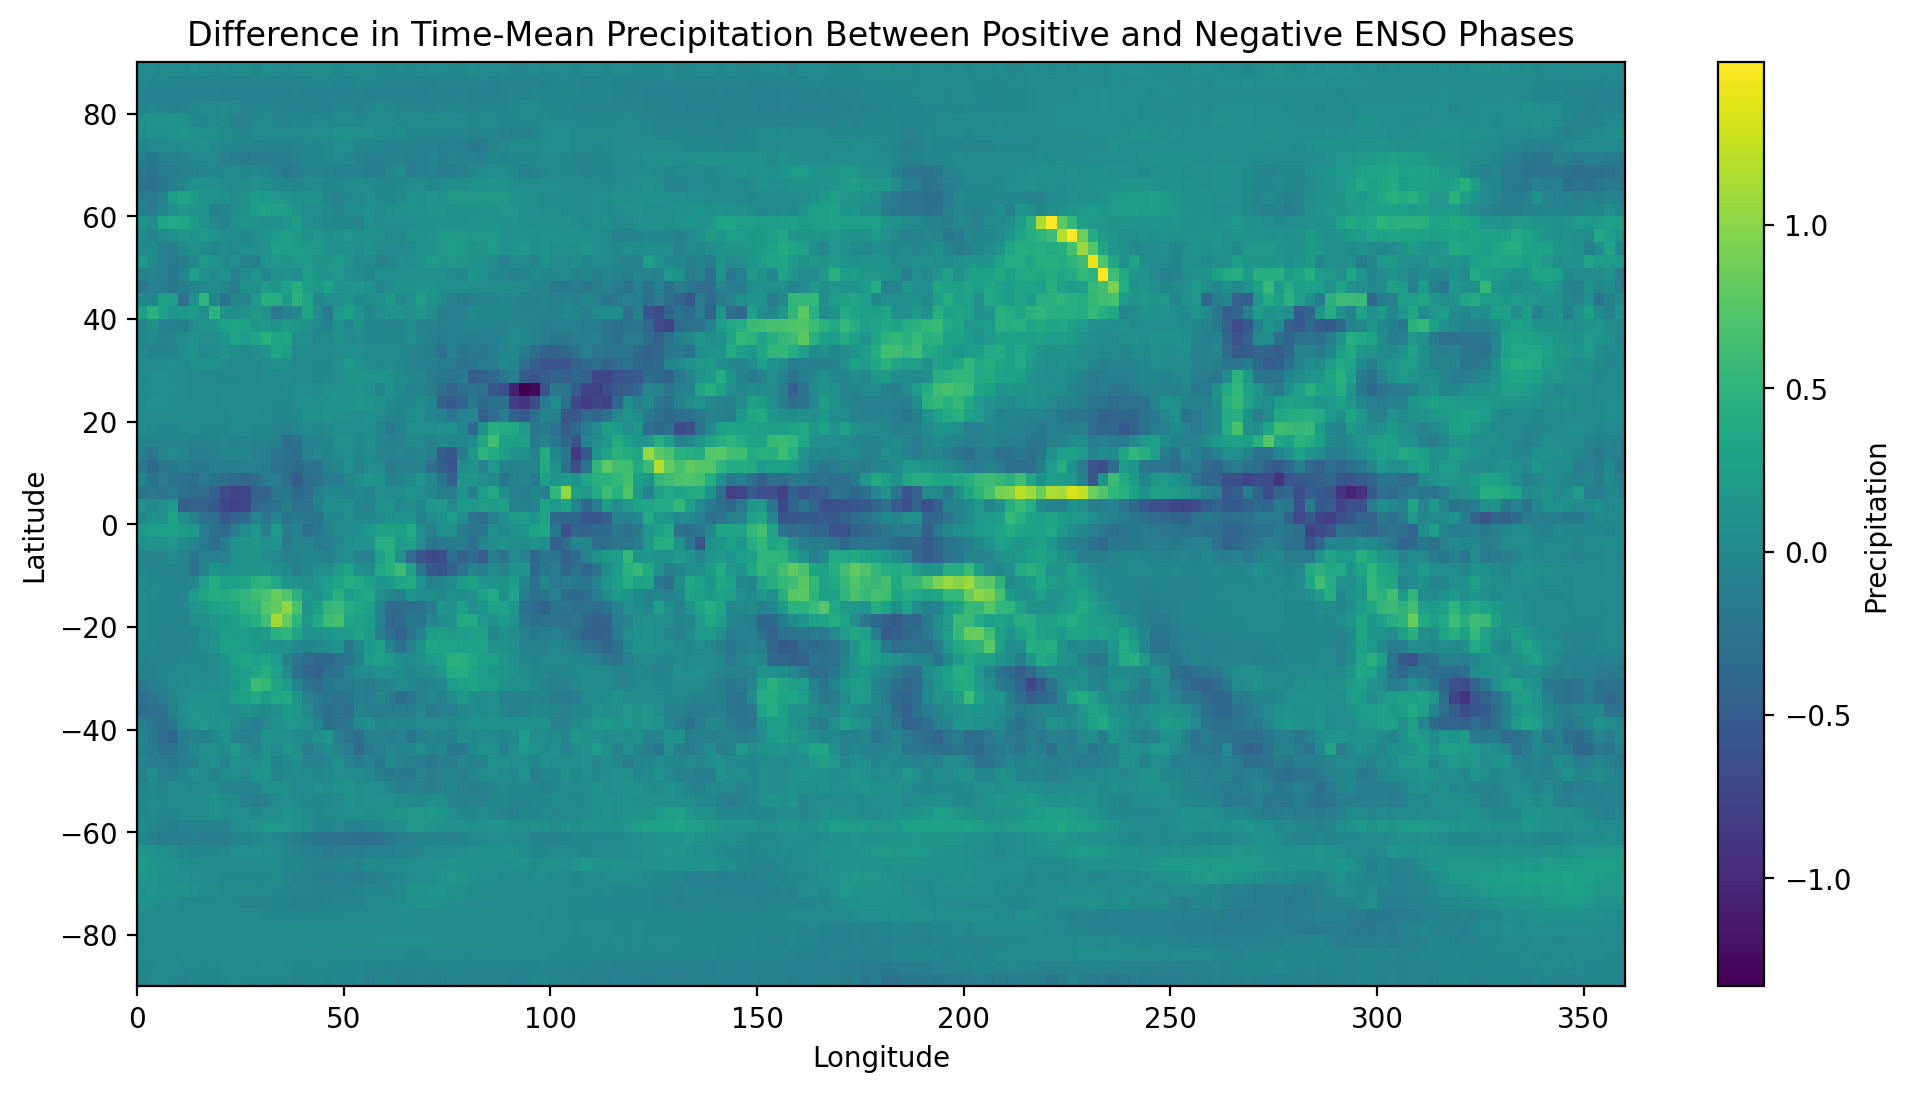

In [98]:
# Plot
c = plt.pcolormesh(difference['X'], difference['Y'], difference.values)
plt.colorbar(c, label='Precipitation')
plt.title('Difference in Time-Mean Precipitation Between Positive and Negative ENSO Phases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()